In [265]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from vega_datasets import data
sf = data.sf_temps()

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [10]:
sf = sf.set_index("date")

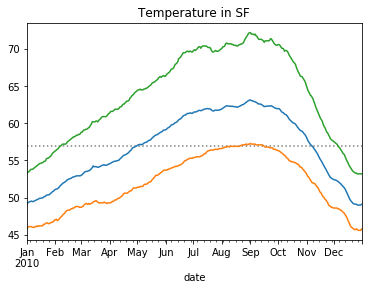

In [37]:
#Average Temperature
sf.resample("d").temp.mean().plot()

#Minimum Temperature
sf.resample("d").temp.min().plot()

#Maximum Temperature
sf.resample("d").temp.max().plot()

plt.hlines(y=sf.temp.mean(),xmin=min(sf.index),xmax=max(sf.index),color="gray",ls=":")
plt.title("Temperature in SF")
plt.show()

In [44]:
sf.resample("m").mean().sort_values(by="temp")

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


On average, January is the coldest month.

In [45]:
sf.resample("m").mean().sort_values(by="temp",ascending=False)

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


On average, September has the highest temperature.

In [48]:
#Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])).
#Use this resampled dataframe to calculate the change in temperature for the day.
#Which month has the highest daily temperature variability?

In [101]:
sf_lh = sf.resample("d").agg(["min","max","mean"])
sf_lh["temp_change"] = sf_lh.temp["min"] - sf_lh.temp["max"]

In [102]:
sf_lh.head()

temp                  temp_change
             min   max       mean            
date                                         
2010-01-01  45.8  53.3  49.170833        -7.5
2010-01-02  46.0  53.4  49.304167        -7.4
2010-01-03  46.1  53.5  49.391667        -7.4
2010-01-04  46.1  53.6  49.445833        -7.5
2010-01-05  46.1  53.8  49.491667        -7.7

In [103]:
sf_lh.resample("m").temp_change.mean().sort_values()

date
2010-09-30   -14.403333
2010-07-31   -13.977419
2010-06-30   -13.950000
2010-08-31   -13.870968
2010-10-31   -13.432258
2010-05-31   -12.909677
2010-04-30   -12.320000
2010-03-31   -10.854839
2010-11-30   -10.236667
2010-02-28    -9.485714
2010-01-31    -8.341935
2010-12-31    -7.925806
Name: temp_change, dtype: float64

September has the highest variability.

Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [106]:
sf_lh.head()

temp                  temp_change
             min   max       mean            
date                                         
2010-01-01  45.8  53.3  49.170833        -7.5
2010-01-02  46.0  53.4  49.304167        -7.4
2010-01-03  46.1  53.5  49.391667        -7.4
2010-01-04  46.1  53.6  49.445833        -7.5
2010-01-05  46.1  53.8  49.491667        -7.7

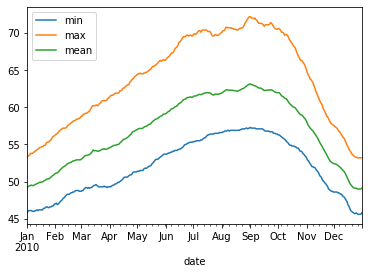

In [109]:
sf_lh.temp.plot()

---

In [112]:
from vega_datasets import data
seattle = data.seattle_weather()

Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [118]:
seattle.head()
seattle.set_index("date", inplace=True)

In [156]:
seattle.precipitation.groupby([seattle.index.year, seattle.index.month]).mean().sort_values(ascending=False).head(1)

date  date
2015  12      9.177419
Name: precipitation, dtype: float64

December 2015 has the highest amount of precipitation.

Text(0.5, 1.0, 'Monthly Precipitation in Seattle')

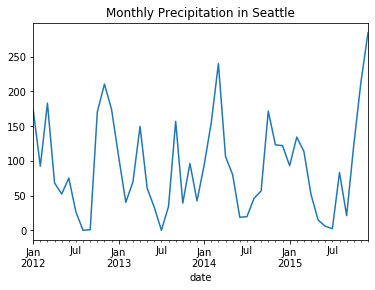

In [141]:
seattle.precipitation.resample("m").sum().plot()
plt.title("Monthly Precipitation in Seattle")

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

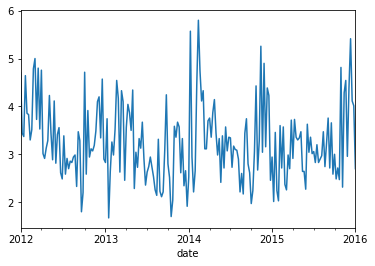

In [145]:
seattle.wind.resample("W").mean().plot()

In [155]:
seattle.wind.groupby([seattle.index.year,seattle.index.month]).mean().sort_values(ascending=False).head(1)

date  date
2014  2       4.528571
Name: wind, dtype: float64

February 2014 is the windiest period.

In [172]:
seattle.weather[seattle.weather == "sun"].resample("Y").count().sort_values(ascending=False).head(1)

date
2014-12-31    211
Name: weather, dtype: int64

2014 is the sunniest year.

In which month does it rain the most?

In [181]:
seattle.wind.groupby(seattle.index.month).sum().sort_values(ascending=False).head(1)

date
12    448.7
Name: wind, dtype: float64

It rains the most in December.

Which month has the most number of days with a non-zero amount of precipitation?

In [228]:
# seattle[seattle.precipitation!=0].groupby(seattle.index.month).count()

In [258]:
flights = data.flights_20k()

Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [266]:
flights["delay"][flights.delay < 0] = 0

In [296]:
flights = flights.set_index("date")

In [313]:
flights.groupby(flights.index.hour)["delay"].mean().sort_values(ascending=False).head(1)

date
3    302.5
Name: delay, dtype: float64

3am has the highest average delay.

In [330]:
flights.delay.groupby(flights.index.day).resample("d").mean()

date  date      
1     2001-01-01    8.747126
      2001-01-02         NaN
      2001-01-03         NaN
      2001-01-04         NaN
      2001-01-05         NaN
      2001-01-06         NaN
      2001-01-07         NaN
      2001-01-08         NaN
      2001-01-09         NaN
      2001-01-10         NaN
      2001-01-11         NaN
      2001-01-12         NaN
      2001-01-13         NaN
      2001-01-14         NaN
      2001-01-15         NaN
      2001-01-16         NaN
      2001-01-17         NaN
      2001-01-18         NaN
      2001-01-19         NaN
      2001-01-20         NaN
      2001-01-21         NaN
      2001-01-22         NaN
      2001-01-23         NaN
      2001-01-24         NaN
      2001-01-25         NaN
      2001-01-26         NaN
      2001-01-27         NaN
      2001-01-28         NaN
      2001-01-29         NaN
      2001-01-30         NaN
                      ...   
31    2001-03-02         NaN
      2001-03-03         NaN
      2001-03-04         N